In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.offsetbox as offsetbox
from matplotlib.animation import FuncAnimation
from pathlib import Path
import argparse

In [30]:
geom = pd.read_csv('iRPC_geom.csv', float_precision='high')
print(geom)

   roll_name           x1           y1           z1           x2           y2  \
0     RE-4/1  3036.218597   772.162852 -10570.89922  2990.219406   804.362139   
1     RE-4/2  2588.799133  1763.906014 -10600.89929  2534.561229  1778.430796   
2     RE-4/3  1829.541670  2543.154757 -10570.89922  1773.606944  2538.253131   
3     RE-4/4   849.318260  3015.278407 -10600.89929   798.433265  2991.541583   
4     RE-4/5  -233.198137  3124.176286 -10570.89922  -272.895919  3084.467274   
..       ...          ...          ...          ...          ...          ...   
67   RE+4/14   232.524957 -3125.341257  10604.10056   272.228372 -3085.637877   
68   RE+4/15  1287.028720 -2857.439857  10574.10054  1310.758370 -2806.551516   
69   RE+4/16  2186.310447 -2245.033351  10604.10045  2191.204187 -2189.097934   
70   RE+4/17  2821.903491 -1361.987021  10574.10032  2807.371063 -1307.751164   
71   RE+4/18  3117.145950  -314.809267  10604.10015  3084.940179  -268.814616   

             z2           x

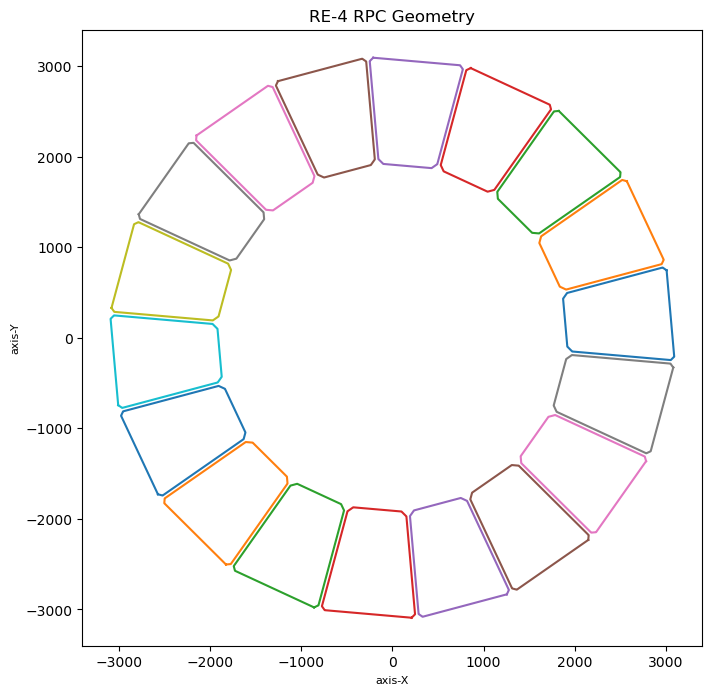

In [21]:
plotting_size = 0.4
fig, ax = plt.subplots(figsize=(plotting_size*20, plotting_size*20))
station = 'RE-4'
station_geom = geom[geom.roll_name.str.startswith(station)]
ratio = 0.95

for i in range(len(station_geom)):
    roll = station_geom.iloc[i]
    center_x = (roll.x1 + roll.x2 + roll.x3 + roll.x4 + roll.x5 + roll.x6 + roll.x7 + roll.x8) / 8
    center_y = (roll.y1 + roll.y2 + roll.y3 + roll.y4 + roll.y5 + roll.y6 + roll.y7 + roll.y8) / 8
    p1_p2_x = np.linspace((roll.x1*ratio + center_x*(1-ratio)), (roll.x2*ratio + center_x*(1-ratio)), 10)
    p1_p2_y = np.linspace((roll.y1*ratio + center_y*(1-ratio)), (roll.y2*ratio + center_y*(1-ratio)), 10)
    p2_p3_x = np.linspace((roll.x2*ratio + center_x*(1-ratio)), (roll.x3*ratio + center_x*(1-ratio)), 10)
    p2_p3_y = np.linspace((roll.y2*ratio + center_y*(1-ratio)), (roll.y3*ratio + center_y*(1-ratio)), 10)
    p3_p4_x = np.linspace((roll.x3*ratio + center_x*(1-ratio)), (roll.x4*ratio + center_x*(1-ratio)), 10)
    p3_p4_y = np.linspace((roll.y3*ratio + center_y*(1-ratio)), (roll.y4*ratio + center_y*(1-ratio)), 10)
    p4_p5_x = np.linspace((roll.x4*ratio + center_x*(1-ratio)), (roll.x5*ratio + center_x*(1-ratio)), 10)
    p4_p5_y = np.linspace((roll.y4*ratio + center_y*(1-ratio)), (roll.y5*ratio + center_y*(1-ratio)), 10)
    p5_p6_x = np.linspace((roll.x5*ratio + center_x*(1-ratio)), (roll.x6*ratio + center_x*(1-ratio)), 10)
    p5_p6_y = np.linspace((roll.y5*ratio + center_y*(1-ratio)), (roll.y6*ratio + center_y*(1-ratio)), 10)
    p6_p7_x = np.linspace((roll.x6*ratio + center_x*(1-ratio)), (roll.x7*ratio + center_x*(1-ratio)), 10)
    p6_p7_y = np.linspace((roll.y6*ratio + center_y*(1-ratio)), (roll.y7*ratio + center_y*(1-ratio)), 10)
    p7_p8_x = np.linspace((roll.x7*ratio + center_x*(1-ratio)), (roll.x8*ratio + center_x*(1-ratio)), 10)
    p7_p8_y = np.linspace((roll.y7*ratio + center_y*(1-ratio)), (roll.y8*ratio + center_y*(1-ratio)), 10)
    p8_p1_x = np.linspace((roll.x8*ratio + center_x*(1-ratio)), (roll.x1*ratio + center_x*(1-ratio)), 10)
    p8_p1_y = np.linspace((roll.y8*ratio + center_y*(1-ratio)), (roll.y1*ratio + center_y*(1-ratio)), 10)
    p_x = np.concatenate((p1_p2_x, p2_p3_x, p3_p4_x, p4_p5_x, p5_p6_x, p6_p7_x, p7_p8_x, p8_p1_x))
    p_y = np.concatenate((p1_p2_y, p2_p3_y, p3_p4_y, p4_p5_y, p5_p6_y, p6_p7_y, p7_p8_y, p8_p1_y))
    plt.plot(p_x, p_y)
    
ax.set_title(f'{station} RPC Geometry', fontsize=plotting_size*30)
ax.set_xlabel('axis-X', fontsize=plotting_size*20)
ax.set_ylabel('axis-Y', fontsize=plotting_size*20)
plt.show()

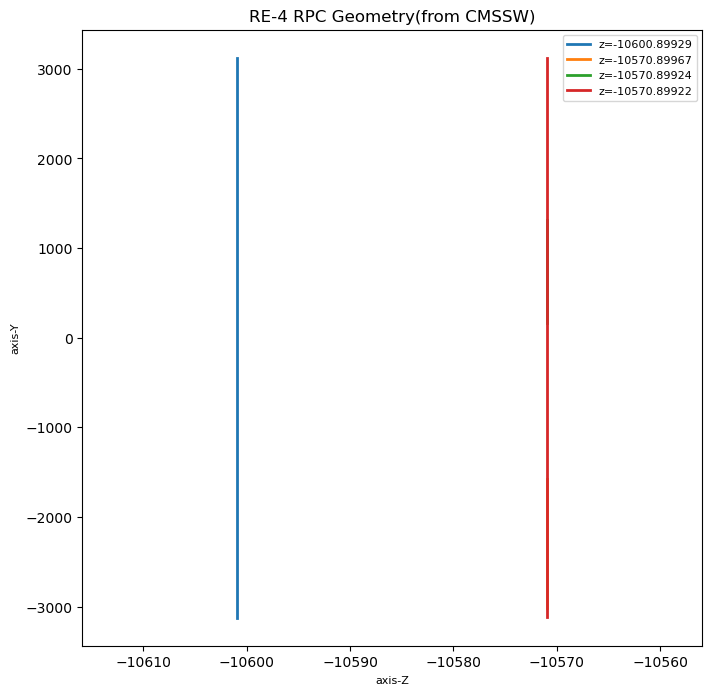

In [27]:
plotting_size = 0.4
fig, ax = plt.subplots(figsize=(plotting_size*20, plotting_size*20))
station = 'RE-4'
station_geom = geom[geom.roll_name.str.startswith(station)]
ratio = 0.95


station_mean_z = station_geom.mean(numeric_only=True).z1
unique_z = station_geom.z1.unique()
for z in np.sort(unique_z):
    z_geom = station_geom[station_geom.z1 == z]
    y_all = np.concatenate([z_geom.y1, z_geom.y2, z_geom.y3, z_geom.y4, z_geom.y5, z_geom.y6, z_geom.y7, z_geom.y8])
    y_min = y_all.min()
    y_max = y_all.max()
    ax.plot([z, z], [y_min, y_max], linewidth=plotting_size*5, label=f'z={z}')

    
ax.set_xlim(station_mean_z - 30, station_mean_z + 30)
ax.set_xlabel('axis-Z', fontsize=plotting_size*20)
ax.set_ylabel('axis-Y', fontsize=plotting_size*20)
ax.set_title(f'{station} RPC Geometry(from CMSSW)', fontsize=plotting_size*30)
ax.legend(fontsize=plotting_size*20, loc='upper right')
plt.show()